# Some examples of how to use DINEOFrun

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim

In [2]:
?DINEOFrun

search: DINEOFrun DINEOF_errormap DINEOF_musquare



```
XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(X,whichgroups=[ ones(Int32,ndims(X)-1)...,2];
minimumcoverage=(0.1, 0.1),
cvmask="Automatic",
cvfraction=0.01,
cvmethod="Random",
maxbubblesize=0.01*[size(X)...],
dimensionsforcopy=[zeros(Int32,ndims(X)-1)...,1],
errormap=true,
musquare=0,
restart=[],
keepsvdcvrestart=true,
eofmax=size(X)[2]-1,
eofstart=1,
dineofmaxiter=10,
dineoftol=0.001,
svdmeth="svd",
svdtol=0.000001,
filter="None",
filterintensity=1.0,
filterrepetitions=1)
```

Provides a DINEOF reconstruction of an N-dimensional array `X`. Missing points are identified with NaN values. Since the input arrays can have more than 2 dimensions, you have to specify which dimensions need to be collapsed into one. To do so the array `whichgroups` specifies to which collapsed dimensions (1 or 2) each dimension is collapsed into. The output is the filtered field. If it is to be merged with the original data, you can use DINEOF_fuse.

# Input:

  * `X`: The N-dimensional array containing the data. Missing points are NaN
  * `whichgroups`: array of "1" or "2" of size ndims(X). for each dimension it tells if it goes into dimensions 1 or 2 for the SVD decomposition. Default is last dimension is group 2 only

# Optional keyword inputs with their defaults:

  * `minimumcoverage=(0.1, 0.1)` : The minimum coverage in each dimension for the collapsed matrix. If the coverage is below the threshold, the line or colums is taken out
  * `cvmask="Automatic"` : You can provide your own cross-validation mask. In that case cvmask is a boolean array of the same size as X with "true" on points for crossvalidation. If "Automatic", DINEOF will create the mask based on the next parameters
  * `cvfraction=0.01` : fraction of points to be used for cross validation (fraction is with respect to valid points)

  * `cvmethod="Random"` : method to create the cross validation mask. "Random" "Bubbles" or "CopyMask": If "Bubbles" are created the maximum size in each direction is specified in maxbubblesize. If "CopyMask" is used, dimensionsforcopy specifies along which dimensions tha NaN pattern of X can be copied to create a mask
  * `maxbubblesize=0.01*[size(X)...]` : maximum size of the bubbles in each direction

*	`dimensionsforcopy=[zeros(Int32,ndims(X)-1),1]`: array of 0 and 1. For each direction is indicates if one can move a mask of NaNs from X along that direction.

*	`errormap=true` : if false, error map returned is []

*	`musquare=0` : You can provide your own estimate of musquare to be used for OI error map calculations. If 0, DINEOF will do the estimate

*	`restart=[]` : You can provide an array of the same size of X to fill in the first guess in the missing points. If not provided, the matrix is filled randomly with a variance of the present data

  * `keepsvdcvrestart=true` : goes back to the best estimate of the reconstruction during final EOF decomposition

*	`eofmax=size(X)[2]-1`: maximum number of EOFs 

*	`eofstart=1` : number of EOFs to start with in the search of the optimum. Can be larger than 1, particularly if you had a good restart matrix

*	`dineofmaxiter=10` : Maximum Number of iterations  USV=X, X=fillfrom(USV) 

*	`dineoftol=0.001` : relative change during iterations below which one stops

*	`svdmeth="svd"` : work with SVD or with eigenvalues of X'X ("eig")

*	`svdtol=0.000001` : tolerance during svd decomposition of filled matrix (svds or eig)

*	`filter="None"` : filter to be applied to dimension 2. Note that this is the dimension in the innermost svd decomposition which might be dimension 1 of the outermost call since a transpose is performed if M<N

*	`filterintensity=1.0` : filter intensity

*	`filterrepetitions=1` : filter repetitions

# Output:

  * `XA` : the analysed (filtered) data filled in in places where enough data where available (see coverage parameter) including the offset: XA=offset+U S V'
  * `offset` : the value that was subtracted from the original data to center them
  * `U` : array of U arrays. To get access to mode 2: U[2][1]
  * `S`: array of singular values. use diagm(S) if you want to work with matrices
  * `V` : array of V arrays: To get mode 3: V[3][1]
  * `cvEOF` : cross validation estimator (variance of misfit at cross validation points)
  * `errmap` : array of the same structure as X containing the error variance estimate of the reconstruction XA
  * `musquare` : the value of mu^2 used for the OI interpretation leading to error maps


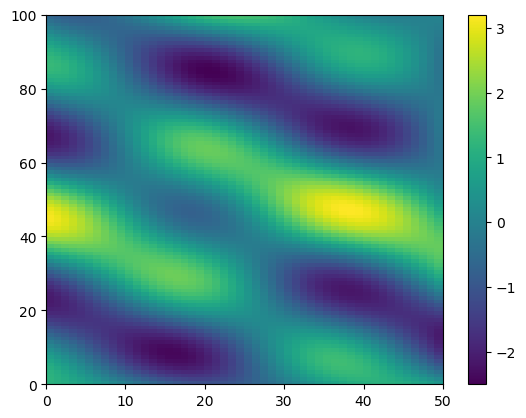

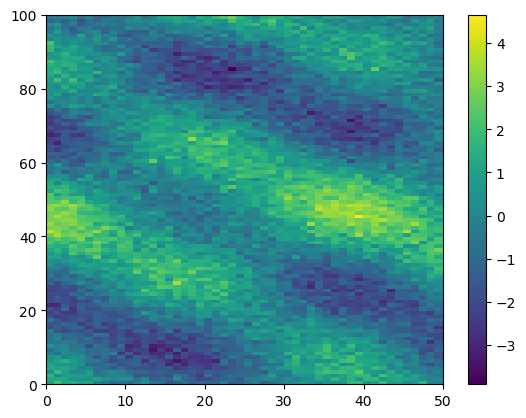

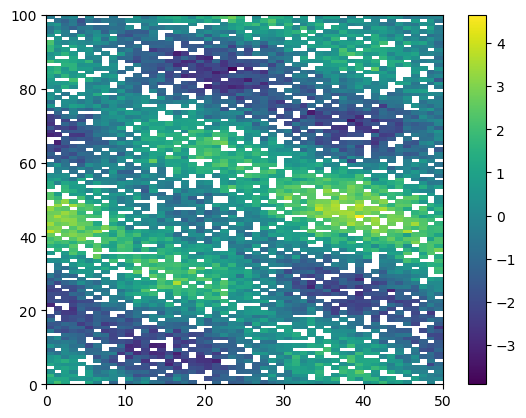

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033AC3908>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000033C51CC0>)

In [3]:
NX=100
NT=50
X=zeros(Float64,NX,NT)
for i=1:NX
    for j=1:NT
        X[i,j]=sin(i/6)*cos(j/6)+cos((i+j)/7)-sin((i/10))+exp(-.0001*(i-40)*(i-40))
    end
end
X=X.-mean(X)
pcolor(X),colorbar()
figure()
X=X+0.5*randn(NX,NT)
pcolor(X),colorbar()
figure()
ntot=prod(size(X))
for i=1:1300
    X[mod(rand(Int),ntot)+1]=NaN
end
pcolor(X),colorbar()

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.010861132660977503
(ccov, size(ccov)) = ([76, 72, 78, 87, 75, 72, 74, 70, 78, 77, 80, 75, 79, 75, 76, 75, 76, 84, 68, 74, 77, 85, 76, 81, 81, 77, 77, 82, 78, 71, 79, 76, 77, 72, 72, 74, 81, 79, 80, 78, 64, 76, 74, 79, 75, 77, 77, 72, 73, 84], (50,))
(lcov, size(lcov)) = ([37, 40, 36, 38, 41, 39, 36, 38, 40, 34, 43, 34, 38, 41, 36, 37, 36, 40, 35, 37, 39, 38, 41, 33, 42, 37, 43, 44, 35, 37, 37, 34, 39, 38, 40, 28, 37, 40, 44, 43, 43, 35, 35, 38, 39, 38, 38, 37, 37, 34, 35, 36, 37, 38, 41, 36, 37, 34, 37, 38, 37, 42, 42, 37, 44, 37, 32, 39, 40, 40, 40, 39, 41, 41, 40, 37, 40, 39, 34, 35, 37, 41, 39, 38, 35, 38, 38, 45, 32, 44, 35, 40, 42, 40, 42, 43, 41, 34, 39, 38], (100,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low cove

┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:105


Convergence for 1 eofs, relative change 0.0008435913547661082 after 7 iterations
Eof loop 1 with mean squared misfit: 0.8836123955682526 
Convergence for 2 eofs, relative change 0.0006074432961678142 after 8 iterations
Eof loop 2 with mean squared misfit: 0.596849248543869 
Convergence for 3 eofs, relative change 0.0009115985032390763 after 8 iterations
Eof loop 3 with mean squared misfit: 0.319940654723365 
Eof loop 4 with mean squared misfit: 0.3212818379903526 
Eof loop 5 with mean squared misfit: 0.31224176608848336 
Eof loop 6 with mean squared misfit: 0.3475327021596457 
Eof loop 7 with mean squared misfit: 0.3533788940433495 
Eof loop 8 with mean squared misfit: 0.36672217035967164 
Eof loop 9 with mean squared misfit: 0.3428490236149181 
Cross validation value (mean squared misfit): 0.31224176608848336 for 5 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.1905029205252076
Estimation of mean error variance of reconstuctions: -0.12173884556327577 
Explained var

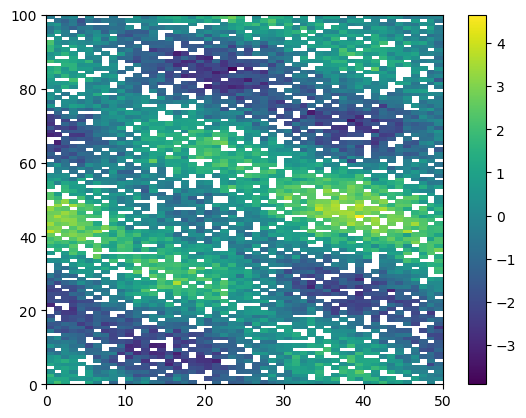

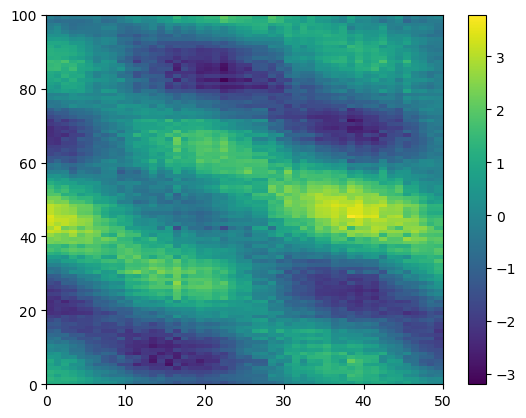


 20.820025 seconds (48.06 M allocations: 2.383 GiB, 7.51% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x0000000040CBFB38>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000040FD2AC8>)

In [4]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Be more severe on admissible coverage in one direction

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.01008533747090768
(ccov, size(ccov)) = ([77, 73, 78, 86, 74, 75, 77, 69, 79, 76, 80, 76, 81, 74, 75, 74, 75, 84, 68, 73, 74, 86, 75, 81, 82, 77, 77, 82, 77, 71, 80, 77, 77, 72, 72, 72, 79, 78, 81, 78, 66, 79, 73, 77, 76, 78, 76, 74, 74, 83], (50,))
(lcov, size(lcov)) = ([37, 40, 34, 38, 41, 39, 37, 39, 41, 33, 43, 34, 40, 40, 35, 37, 37, 41, 36, 37, 39, 38, 41, 33, 42, 39, 44, 44, 35, 37, 38, 35, 39, 38, 39, 28, 37, 40, 44, 43, 43, 38, 35, 38, 37, 39, 38, 37, 37, 33, 36, 35, 37, 37, 41, 36, 38, 34, 39, 39, 36, 43, 42, 37, 43, 37, 32, 39, 40, 40, 41, 40, 41, 41, 39, 37, 42, 37, 33, 35, 37, 40, 38, 36, 35, 37, 38, 44, 32, 44, 34, 39, 42, 41, 41, 43, 41, 33, 41, 38], (100,))
(rlow, clow) = ([1, 3, 4, 6, 7, 8, 10, 12, 15, 16, 17, 19, 20, 21, 22, 24, 26, 29, 30,

┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:105


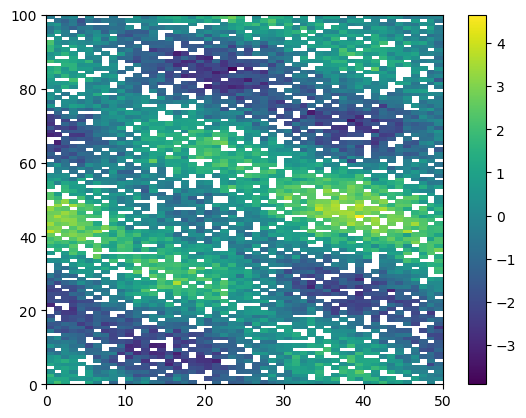

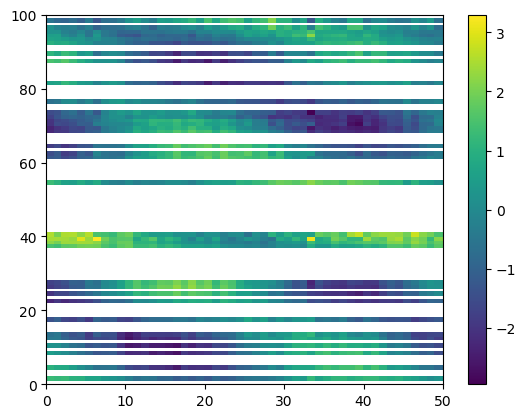

Eof loop 8 with mean squared misfit: 0.2909209432199949 
Cross validation value (mean squared misfit): 0.1830991257279762 for 4 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.1798252069748591
Estimation of mean error variance of reconstuctions: -0.003273918753117111 
Explained variance  90.3517736340863 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.089913, 17.982521]
 * Minimizer: 9.801981e-02
 * Minimum: 5.264806e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.1830991257279762 is now 0.1365701934795668 if OI is used
Optimal musquare is 0.09801981316908176
Relative error on reconstruction 5.639805441621195e-6, relative error on CV estimator 0.06457637044623882
The two criteria to compare OI and EOF are: reconstruction 0.00986965952283709, clos

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000337A6470>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000339521D0>)

In [5]:
XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X;minimumcoverage=(0.8,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Here forcing inversion of dimensions only forces internal transpose

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.01034393586759762
(ccov, size(ccov)) = ([37, 39, 34, 38, 41, 38, 37, 39, 41, 34, 41, 34, 40, 41, 36, 36, 37, 41, 35, 37, 41, 37, 40, 33, 42, 38, 44, 44, 36, 37, 38, 35, 39, 39, 39, 28, 37, 41, 44, 42, 43, 38, 35, 37, 38, 39, 36, 36, 36, 33, 35, 36, 37, 37, 41, 36, 38, 32, 39, 38, 37, 44, 42, 37, 43, 39, 32, 39, 40, 40, 41, 39, 40, 41, 40, 36, 42, 39, 34, 34, 37, 41, 38, 38, 35, 38, 38, 45, 32, 43, 35, 39, 42, 39, 42, 42, 41, 34, 41, 38], (100,))
(lcov, size(lcov)) = ([78, 74, 78, 84, 75, 74, 76, 68, 79, 76, 80, 77, 81, 74, 76, 74, 76, 84, 68, 72, 78, 86, 76, 81, 81, 77, 76, 82, 76, 71, 79, 75, 77, 70, 72, 74, 80, 78, 78, 78, 66, 79, 75, 77, 76, 77, 75, 74, 76, 83], (50,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low cover

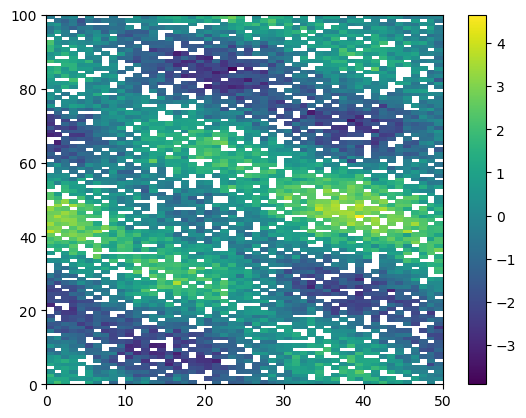

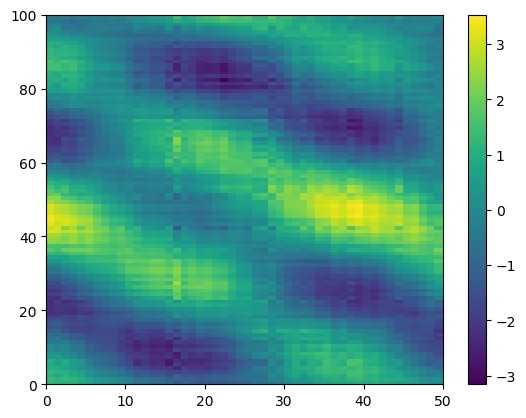


Eof loop 8 with mean squared misfit: 0.4084609815229407 
Cross validation value (mean squared misfit): 0.26254256956503824 for 4 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.20552110540948615
Estimation of mean error variance of reconstuctions: -0.05702146415555209 
Explained variance  88.78532715555421 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.102761, 20.552111]
 * Minimizer: 2.475821e+00
 * Minimum: 1.486796e+00
 * Iterations: 7
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 8
CV estimator from EOF 0.26254256956503824 is now 0.22948600020146476 if OI is used
Optimal musquare is 2.4758214727804746
Relative error on reconstruction 0.0001705338805623448, relative error on CV estimator 0.01585316929213951
The two criteria to compare OI and EOF are: reconstruction 0.852669402811724, clos

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000412C3F28>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000415D9EB8>)

In [6]:
XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Limit number of eofs to 2

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.01008533747090768
(ccov, size(ccov)) = ([36, 39, 35, 37, 40, 39, 37, 38, 41, 34, 42, 33, 39, 41, 36, 36, 38, 41, 36, 37, 41, 38, 41, 33, 41, 38, 43, 44, 36, 37, 38, 35, 39, 39, 40, 28, 37, 40, 44, 43, 42, 38, 35, 38, 39, 39, 38, 37, 36, 33, 36, 36, 36, 38, 41, 37, 38, 34, 39, 39, 35, 44, 42, 37, 42, 39, 32, 37, 39, 39, 41, 40, 41, 41, 40, 37, 41, 38, 35, 34, 36, 41, 38, 37, 35, 38, 38, 45, 32, 44, 34, 40, 41, 39, 42, 42, 40, 34, 41, 38], (100,))
(lcov, size(lcov)) = ([77, 73, 78, 85, 74, 73, 75, 68, 78, 77, 80, 76, 81, 75, 76, 72, 74, 83, 66, 74, 78, 85, 75, 81, 81, 77, 77, 82, 78, 70, 79, 77, 77, 72, 71, 74, 80, 78, 81, 79, 66, 80, 74, 79, 75, 77, 77, 73, 77, 83], (50,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low cover

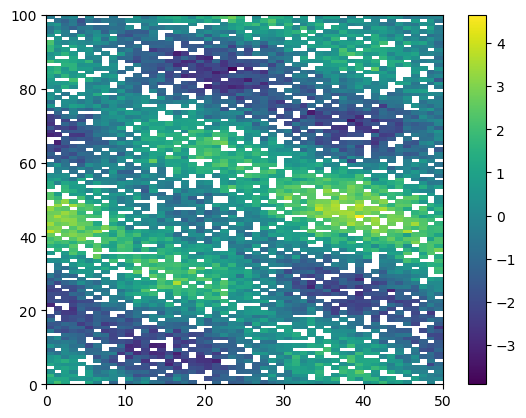

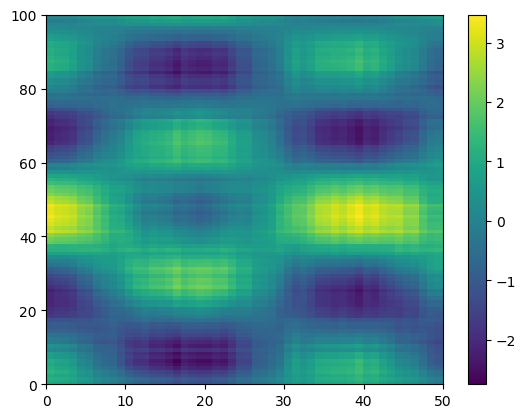


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.230535, 46.106938]
 * Minimizer: 2.513215e-01
 * Minimum: 7.506189e-02
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.3782729976895217 is now 0.36195647857126534 if OI is used
Optimal musquare is 0.25132146484456175
Relative error on reconstruction 4.999878120435383e-7, relative error on CV estimator 0.0018605628543181347
The two criteria to compare OI and EOF are: reconstruction 0.002499939060217691, closest CV 0.07256195131840726
Estimated musquare 0.4610693794624936 was inflated by factor 0.5450838334515898 into 0.25132146484456175
This optimal value provides OI interpolation CV estimator 0.36195647857126534
Mean error variance of reconstruction: 0.006539089397655649 
Internally final matrix was transposed for SVD analysis
  0.282047 seconds (636.82 k allocations: 74.796 MiB, 7.74%

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033775EF0>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004123E0F0>)

In [7]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


Check if restart improves time

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.01060253426428756
(ccov, size(ccov)) = ([37, 40, 35, 37, 40, 39, 37, 38, 41, 33, 42, 33, 40, 41, 35, 37, 38, 40, 35, 36, 41, 38, 41, 32, 42, 37, 44, 44, 35, 37, 38, 35, 39, 39, 39, 28, 36, 41, 44, 43, 43, 38, 35, 38, 38, 39, 36, 37, 37, 34, 36, 36, 37, 38, 41, 37, 38, 33, 39, 39, 36, 44, 41, 37, 43, 39, 31, 39, 40, 39, 41, 40, 38, 41, 39, 35, 42, 39, 35, 35, 36, 41, 39, 38, 35, 37, 38, 44, 31, 43, 34, 40, 42, 41, 41, 43, 41, 33, 41, 38], (100,))
(lcov, size(lcov)) = ([78, 74, 78, 85, 73, 74, 77, 70, 79, 75, 80, 75, 79, 74, 76, 75, 76, 82, 68, 73, 77, 86, 75, 80, 81, 76, 77, 79, 76, 71, 79, 76, 78, 71, 72, 74, 81, 77, 81, 78, 64, 80, 74, 78, 76, 78, 77, 73, 76, 84], (50,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low cover

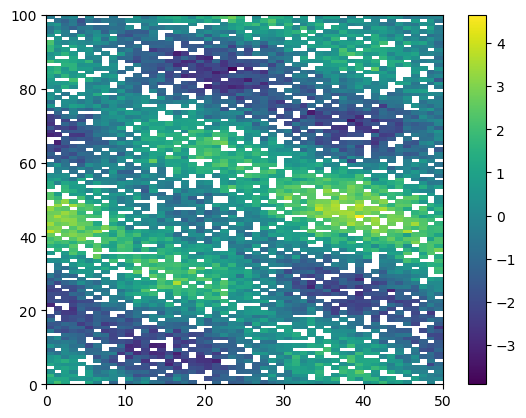

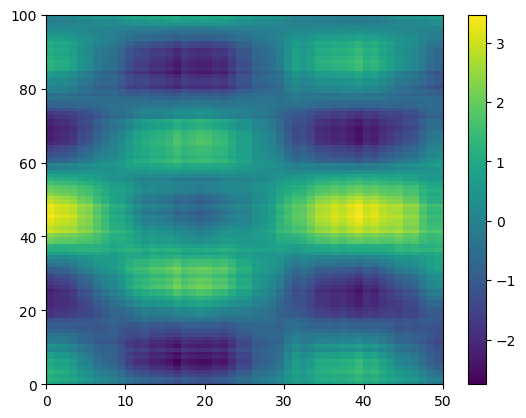


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.230519, 46.103837]
 * Minimizer: 2.513046e-01
 * Minimum: 2.208564e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.5090078416579774 is now 0.4718637405570445 if OI is used
Optimal musquare is 0.2513045624322756
Relative error on reconstruction 5.051507267878596e-7, relative error on CV estimator 0.00532513668206515
The two criteria to compare OI and EOF are: reconstruction 0.0025257536339392977, closest CV 0.21833060396467116
Estimated musquare 0.4610383706318352 was inflated by factor 0.5450838334515898 into 0.2513045624322756
This optimal value provides OI interpolation CV estimator 0.4718637405570445
Mean error variance of reconstruction: 0.006538639605329283 
Internally final matrix was transposed for SVD analysis
  1.347129 seconds (2.84 M allocations: 167.929 MiB, 5.10% gc ti

(PyObject <matplotlib.collections.PolyCollection object at 0x000000000150FC18>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000001820BA8>)

In [8]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


starting with the right number of EOFs should lead to 1 iteration

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.01034393586759762
(ccov, size(ccov)) = ([37, 39, 36, 38, 41, 39, 37, 39, 40, 31, 43, 34, 39, 40, 36, 37, 38, 41, 36, 37, 41, 37, 40, 33, 42, 39, 44, 44, 36, 37, 38, 34, 36, 39, 39, 28, 35, 40, 44, 43, 43, 37, 34, 38, 38, 39, 37, 36, 37, 34, 36, 35, 37, 38, 41, 37, 37, 34, 39, 39, 36, 44, 42, 37, 44, 36, 32, 39, 40, 40, 41, 37, 41, 42, 39, 37, 41, 38, 35, 35, 37, 41, 39, 38, 35, 37, 38, 44, 32, 43, 35, 40, 42, 40, 41, 43, 41, 34, 40, 38], (100,))
(lcov, size(lcov)) = ([77, 74, 79, 87, 75, 75, 77, 69, 78, 76, 78, 77, 81, 75, 74, 75, 75, 84, 67, 73, 77, 85, 76, 80, 83, 77, 77, 82, 77, 71, 79, 76, 77, 72, 71, 73, 81, 74, 81, 78, 64, 80, 75, 77, 75, 77, 75, 74, 75, 82], (50,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low cover

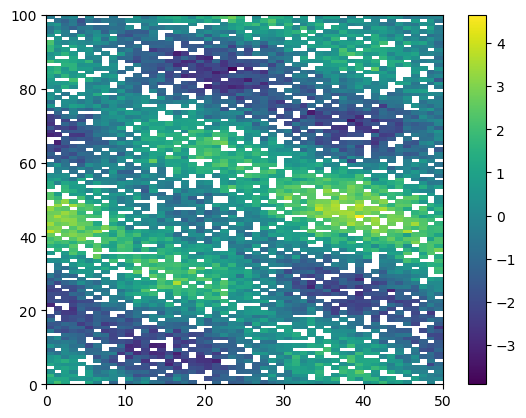

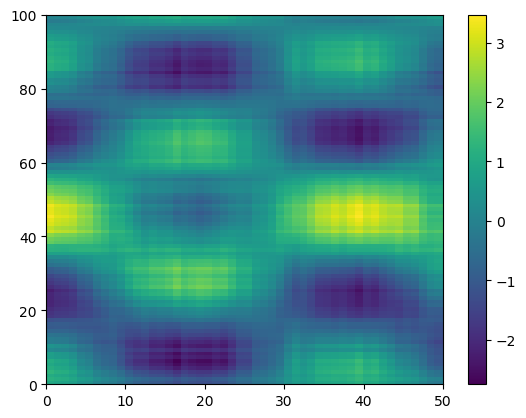


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.230509, 46.101855]
 * Minimizer: 2.512938e-01
 * Minimum: 1.259598e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.3857160168152961 is now 0.4071406078816017 if OI is used
Optimal musquare is 0.25129376021161287
Relative error on reconstruction 5.099966214907111e-7, relative error on CV estimator 0.00308524555969262
The two criteria to compare OI and EOF are: reconstruction 0.002549983107453555, closest CV 0.12340982238770479
Estimated musquare 0.4610185530918536 was inflated by factor 0.54508383345159 into 0.25129376021161287
This optimal value provides OI interpolation CV estimator 0.4071406078816017
Mean error variance of reconstruction: 0.006538399110618036 
Internally final matrix was transposed for SVD analysis
  0.169926 seconds (260.85 k allocations: 59.964 MiB, 6.56% gc ti

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000001B58940>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000001E6E8D0>)

In [9]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofstart=2,eofmax=2,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


Can we force a certain number of EOFs, say 9 ?

Try without cross validation points and use 

Raw data variance and mean: 1.8512453175599928 and 0.007205478538788035
Number of missing points (including possible masks): 1133 out of 5000
Number of data points before elimination of low coverage regions is 3867 and cv fraction 0.0
(ccov, size(ccov)) = ([37, 40, 36, 38, 41, 39, 37, 39, 41, 34, 43, 34, 40, 41, 36, 37, 38, 41, 36, 37, 41, 38, 41, 33, 42, 39, 44, 44, 36, 37, 38, 35, 39, 39, 40, 28, 37, 41, 44, 43, 43, 38, 35, 38, 39, 39, 38, 37, 37, 34, 36, 36, 37, 38, 41, 37, 38, 34, 39, 39, 37, 44, 42, 37, 44, 39, 32, 39, 40, 40, 41, 40, 41, 42, 40, 37, 42, 39, 35, 35, 37, 41, 39, 38, 35, 38, 38, 45, 32, 44, 35, 40, 42, 41, 42, 43, 41, 34, 41, 38], (100,))
(lcov, size(lcov)) = ([78, 74, 79, 87, 75, 75, 77, 70, 79, 77, 80, 77, 81, 75, 77, 75, 76, 84, 68, 74, 78, 86, 76, 81, 83, 78, 77, 82, 78, 71, 80, 77, 78, 72, 72, 74, 81, 79, 81, 79, 66, 80, 75, 79, 76, 78, 77, 74, 77, 84], (50,))
(rlow, clow) = (Int64[], Int64[])
Number of data points after elimination of low coverage regions is 3

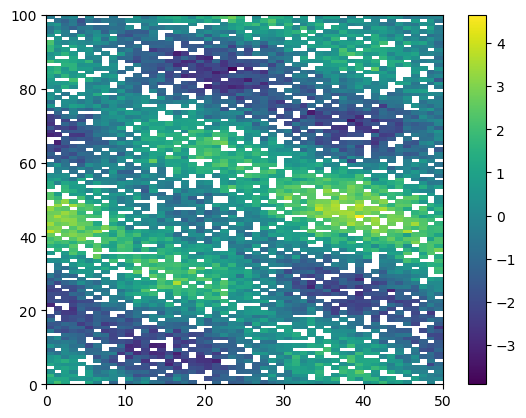

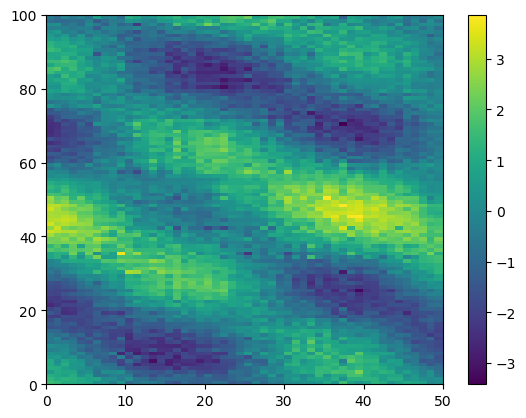


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.068231, 13.646198]
 * Minimizer: 7.438322e-02
 * Minimum: 2.537950e-02
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 1.111111111111111e36 is now 1.0e36 if OI is used
Optimal musquare is 0.07438322070096222
Relative error on reconstruction 5.075899008764905e-6, relative error on CV estimator 0
The two criteria to compare OI and EOF are: reconstruction 0.025379495043824526, closest CV 0
Estimated musquare 0.1364619827925393 was inflated by factor 0.54508383345159 into 0.07438322070096222
This optimal value provides OI interpolation CV estimator 1.0e36
Mean error variance of reconstruction: 0.008757622193757393 
Internally final matrix was transposed for SVD analysis
  0.948257 seconds (2.54 M allocations: 247.777 MiB, 6.22% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x0000000001128A58>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000001EA99E8>)

In [10]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),cvfraction=0.0,eofmax=9,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

In [11]:
SG

9-element Array{Float64,1}:
 68.7106119762714  
 46.56299362598402 
 35.09828823439664 
 10.176017838080066
  9.922748092038551
  9.55451389725119 
  9.384788582774853
  8.739132366712083
  8.352008631841759